# Movie Rating Prediction

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [2]:
# Load the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')


# Data cleaning

In [3]:
# Drop rows where all values are NaN
df_cleaned = df.dropna(how='all')

In [4]:
# Convert Rating and Votes to numeric and fill missing values with the mean
df_cleaned['Rating'] = pd.to_numeric(df_cleaned['Rating'], errors='coerce')
df_cleaned['Votes'] = pd.to_numeric(df_cleaned['Votes'], errors='coerce')


In [5]:
df_cleaned['Rating'].fillna(df_cleaned['Rating'].mean(), inplace=True)
df_cleaned['Votes'].fillna(df_cleaned['Votes'].mean(), inplace=True)


In [6]:
# Fill missing categorical values with the mode (most frequent value)
df_cleaned['Genre'].fillna(df_cleaned['Genre'].mode()[0], inplace=True)
df_cleaned['Director'].fillna(df_cleaned['Director'].mode()[0], inplace=True)
df_cleaned['Actor 1'].fillna(df_cleaned['Actor 1'].mode()[0], inplace=True)
df_cleaned['Actor 2'].fillna(df_cleaned['Actor 2'].mode()[0], inplace=True)
df_cleaned['Actor 3'].fillna(df_cleaned['Actor 3'].mode()[0], inplace=True)


In [7]:
# Drop rows with missing critical values (e.g., 'Year' and 'Duration')
df_cleaned = df_cleaned.dropna(subset=['Year', 'Duration'])


In [8]:
# Save the cleaned dataset
df_cleaned.to_csv('IMDb_Movies_India_Cleaned.csv', index=False)


In [9]:
# Display the first few rows of the cleaned dataset
df_cleaned.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.841621,120.839493,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.841621,120.839493,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.700000,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [10]:
df_cleaned.shape


(7115, 10)

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7115 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7115 non-null   object 
 1   Year      7115 non-null   object 
 2   Duration  7115 non-null   object 
 3   Genre     7115 non-null   object 
 4   Rating    7115 non-null   float64
 5   Votes     7115 non-null   float64
 6   Director  7115 non-null   object 
 7   Actor 1   7115 non-null   object 
 8   Actor 2   7115 non-null   object 
 9   Actor 3   7115 non-null   object 
dtypes: float64(2), object(8)
memory usage: 611.4+ KB


In [12]:
df_cleaned.describe()

,Rating,Votes
count,7115.000000,7115.000000
mean,5.915841,146.248262
std,1.260899,175.896431
min,1.100000,5.000000
25%,5.300000,37.000000
50%,5.841621,120.839493
75%,6.800000,120.839493
max,10.000000,999.000000


In [13]:
df_cleaned.describe(include = 'object')

,Name,Year,Duration,Genre,Director,Actor 1,Actor 2,Actor 3
count,7115,7115,7115,7115,7115,7115,7115,7115
unique,6740,92,181,423,3255,2689,2958,3141
top,Guru,(2019),120 min,Drama,David Dhawan,Ashok Kumar,Rekha,Pran
freq,5,330,227,1330,41,342,430,568


In [14]:
df_cleaned.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [15]:
df_cleaned.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Exploratory Data Analysis

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt



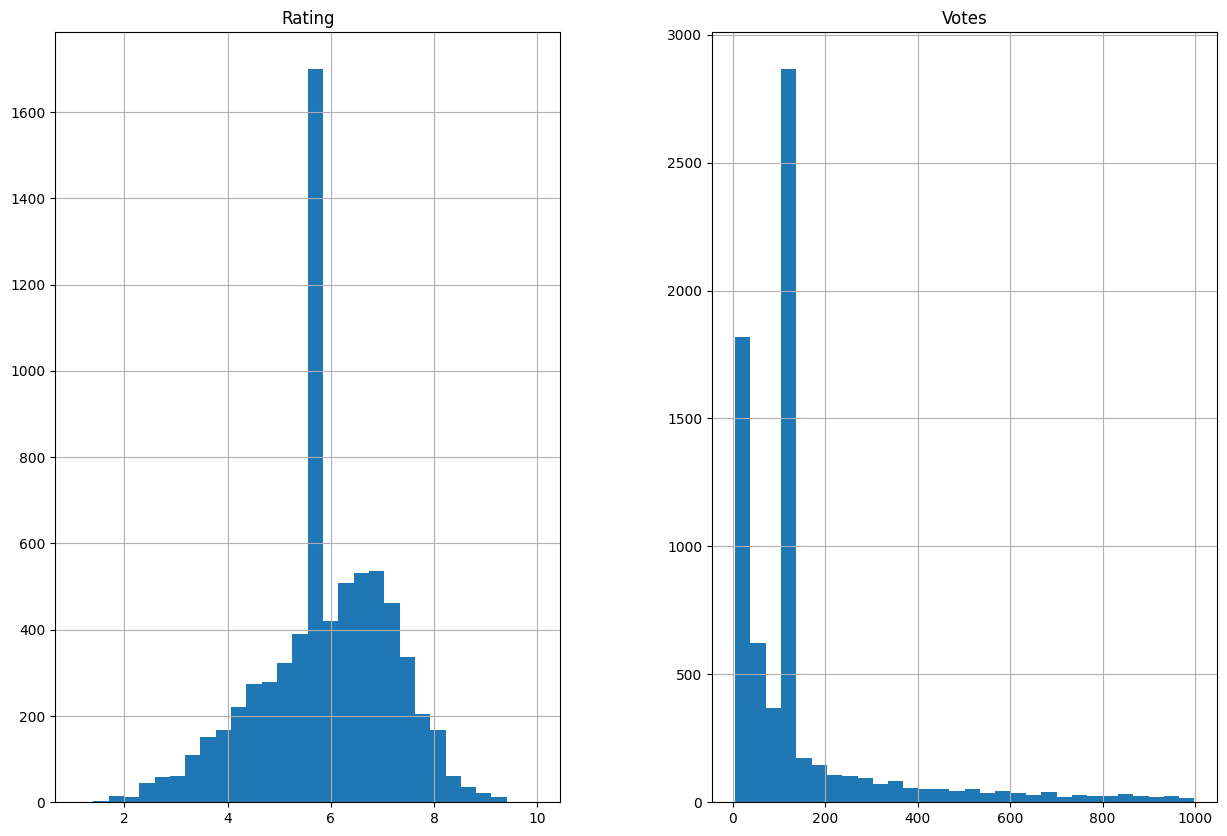

In [17]:
# Plot distribution of numerical columns
df_cleaned.hist(bins=30, figsize=(15, 10))
plt.show()

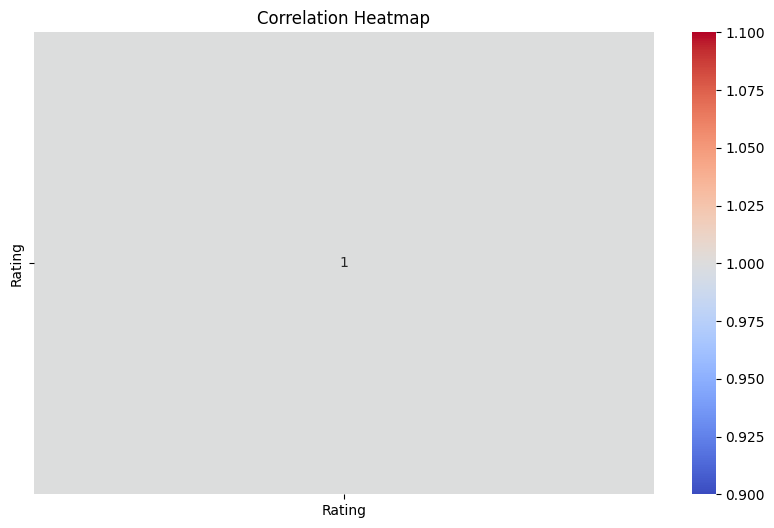

In [18]:
# Plot correlations heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Checking value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Name:
Anjaam                7
Mamta                 7
Zindagi               6
Musafir               6
Albela                5
                     ..
Hamen Bhi Jeene Do    1
Hamen Khelne Do       1
Hameshaa              1
Hamid                 1
Zulm-O-Sitam          1
Name: Name, Length: 13838, dtype: int64

Value counts for Year:
(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: Year, Length: 102, dtype: int64

Value counts for Duration:
120 min    240
135 min    173
130 min    171
140 min    167
150 min    154
          ... 
201 min      1
206 min      1
198 min      1
218 min      1
250 min      1
Name: Duration, Length: 182, dtype: int64

Value counts for Genre:
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                     

# Data Visualization

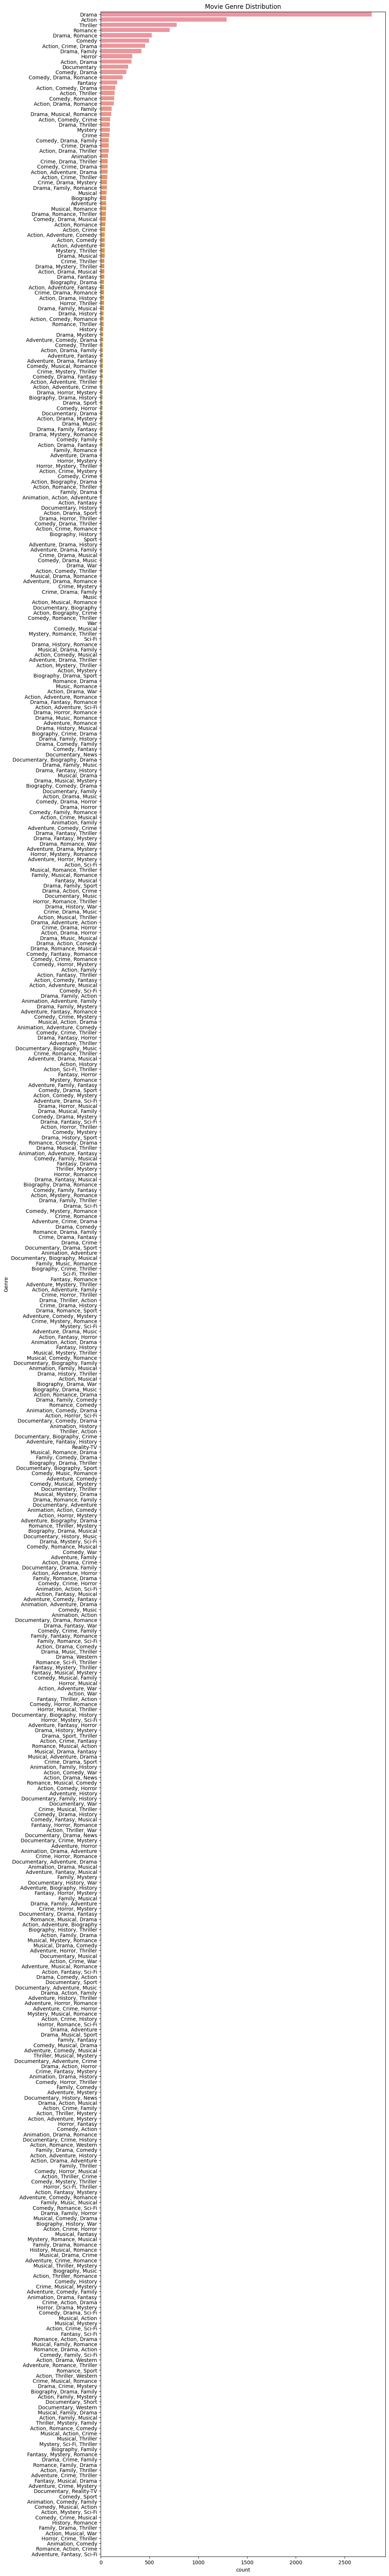

In [25]:
# Bar plot for categorical data
plt.figure(figsize=(10,90))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Movie Genre Distribution')
plt.show()

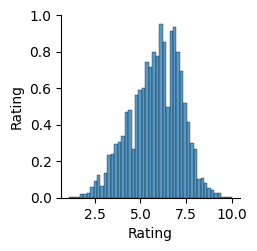

In [26]:
# Scatter plot of numeric features
sns.pairplot(df)
plt.show()

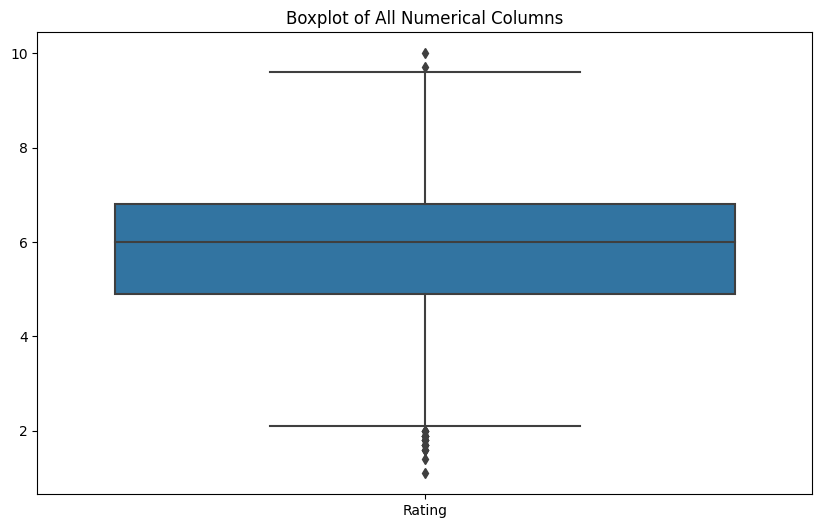

In [27]:
# Boxplot to check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Boxplot of All Numerical Columns')
plt.show()

# Feature Engineering

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
# Encoding categorical features
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [30]:
# Check the data after encoding
print(df.head())



   Name  Year  Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  \
0     0   102       182    299     NaN   2034      1926     2250      800   
1     1    98         9    299     7.0   1849      1548     3280     4790   
2     2   100       172    351     NaN   2034      5123     3713     2866   
3     3    98        10    228     4.4   1169      3319     2917     1504   
4     7    89         5    299     NaN   2034       385     3112     3462   

   Actor 3  
0     3108  
1      527  
2     3450  
3     4020  
4      405  


In [33]:
# Feature and target separation (replace 'target_column' with the actual target)
X = df.drop('Rating', axis=1)
y = df['Votes']

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [36]:
# Initialize model
model = DecisionTreeClassifier(random_state=42)

In [37]:
# Train the model
model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [38]:
# Make predictions
y_pred = model.predict(X_test)


In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 85.73%
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.